# Part 1: Data preprocessing and Data Cleaning
In this part, the game data crawled down from the top trending of Roblox is used. Firstly, after the data is imported, it is directly printed to give a rough impression of it.

In [1]:
import pandas as pd

df = pd.read_csv('toptrending.csv')

df

,Name,Active,Favorites,Visits,Up Votes,Down Votes,Communication,Created,Updated,Server Size,Genre,Subgenre
0,Adopt Me!,126659,26978387,37.5B+,7309429,1439349,NaN,7/14/2017,10/11/2024,48,Roleplay & Avatar Sim,Pet Care
1,Welcome to Bloxburg,35144,13554029,8.9B+,5302944,714420,Microphone Camera,11/3/2014,10/15/2024,12,Roleplay & Avatar Sim,Life
2,[🗡️JUJUTSU KAISEN🌃] A Universal Time 3.8🚩,34564,1288220,762.2M+,776310,133062,Microphone,6/3/2020,10/12/2024,1,RPG,Action RPG
3,Emergency Hamburg,9207,509261,424.5M+,202225,38087,Microphone,10/11/2021,10/10/2024,42,Roleplay & Avatar Sim,Life
4,Swim League [World 6],10715,528181,18.2M+,47441,2169,NaN,8/27/2024,10/15/2024,10,NaN,NaN
5,Hide or Die!,11041,503875,5.0M+,2613,925,Microphone Camera,8/4/2024,10/15/2024,12,NaN,NaN
6,Like or Pass,9016,25589,16.1M+,14168,5290,Microphone Camera,9/13/2024,10/15/2024,28,NaN,NaN
7,[UPDATE!] Speed Draw!,7858,1478653,1.2B+,372592,55282,Microphone,7/10/2021,10/15/2024,8,Party & Casual,Coloring & Drawing
8,Legends Battlegrounds,7576,118050,45.1M+,66789,16000,Microphone,11/4/2023,10/12/2024,15,NaN,NaN
9,🛕[GOD] Dragon Soul | Anime Adventure 🐲[x2 Week],7294,467177,108.0M+,300538,14411,Microphone,12/13/2021,10/14/2024,24,RPG,Action RPG


As is shown, the format of date is not the format that can be easily done computation on, so it should be changed to the 'datetime64' format.

In [3]:
from datetime import datetime
def parse_date(date):
  format = '%m/%d/%Y'
  try:
    return datetime.strptime(date,format)
  except ValueError:
    return pd.NaT

df['Created'] = df['Created'].astype(str)
df['Created_parsed'] = df['Created'].apply(parse_date)
df['Created_parsed'] = df['Created_parsed'].dt.strftime('%Y-%m-%d')
df['Created_parsed'] = pd.to_datetime(df['Created_parsed'])
df['Created'] = df['Created_parsed']
df = df.drop(columns=['Created_parsed'])

df['Updated'] = df['Updated'].astype(str)
df['Updated_parsed'] = df['Updated'].apply(parse_date)
df['Updated_parsed'] = df['Updated_parsed'].dt.strftime('%Y-%m-%d')
df['Updated_parsed'] = pd.to_datetime(df['Updated_parsed'])
df['Updated'] = df['Updated_parsed']
df = df.drop(columns=['Updated_parsed'])

df

,Name,Active,Favorites,Visits,Up Votes,Down Votes,Communication,Created,Updated,Server Size,Genre,Subgenre
0,Adopt Me!,126659,26978387,37.5B+,7309429,1439349,NaN,2017-07-14,2024-10-11,48,Roleplay & Avatar Sim,Pet Care
1,Welcome to Bloxburg,35144,13554029,8.9B+,5302944,714420,Microphone Camera,2014-11-03,2024-10-15,12,Roleplay & Avatar Sim,Life
2,[🗡️JUJUTSU KAISEN🌃] A Universal Time 3.8🚩,34564,1288220,762.2M+,776310,133062,Microphone,2020-06-03,2024-10-12,1,RPG,Action RPG
3,Emergency Hamburg,9207,509261,424.5M+,202225,38087,Microphone,2021-10-11,2024-10-10,42,Roleplay & Avatar Sim,Life
4,Swim League [World 6],10715,528181,18.2M+,47441,2169,NaN,2024-08-27,2024-10-15,10,NaN,NaN
5,Hide or Die!,11041,503875,5.0M+,2613,925,Microphone Camera,2024-08-04,2024-10-15,12,NaN,NaN
6,Like or Pass,9016,25589,16.1M+,14168,5290,Microphone Camera,2024-09-13,2024-10-15,28,NaN,NaN
7,[UPDATE!] Speed Draw!,7858,1478653,1.2B+,372592,55282,Microphone,2021-07-10,2024-10-15,8,Party & Casual,Coloring & Drawing
8,Legends Battlegrounds,7576,118050,45.1M+,66789,16000,Microphone,2023-11-04,2024-10-12,15,NaN,NaN
9,🛕[GOD] Dragon Soul | Anime Adventure 🐲[x2 Week],7294,467177,108.0M+,300538,14411,Microphone,2021-12-13,2024-10-14,24,RPG,Action RPG


Then we will do some cleaning. First, we should investigate into the missing and duplicated values.

In [4]:
info = df.count()
print("The situation of missing values is: ")
print(info)
duplicated_rows = df.duplicated().sum()
print(f"There are {duplicated_rows} duplicated rows.")

The situation of missing values is: 
Name             50
Active           50
Favorites        50
Visits           50
Up Votes         50
Down Votes       50
Communication    40
Created          50
Updated          50
Server Size      50
Genre            34
Subgenre         30
dtype: int64
There are 0 duplicated rows.


As is printed, there are some missing values in 'Communication', 'Genre' and 'Subgenre' column, and there is no missing value.

As for missing values, those in 'Communication' columns are actually not missing values. The 'NaN' values here are more like 'blank' values, indicating those game don't have any communication methods. Those in 'Genre' and 'Subgenre' column are Missing at Random. I have a hypothesis that games with close created dates, for example in 2024, will have 'NaN' values in their 'Genre' and 'Subgenre' column. I will look into this hypothesis in the data exploration part.

# Part 2: Basic data exploration and summary statistics

3 Research Question:

### RQ1: Are Missing values in 'Genre' and 'Subgenre' column caused by close created date?
### RQ2: Does active number has relationship with created date?
### RQ3: Does like rate have any influence on active number?

## RQ1
Methodology: Use the Chi-Squared Test of Independence or Fisher's Exact Test to determine if there's a significant association between the 'Created' date being in 2024 and the missingness of 'Genre' and 'Subgenre'.

Null Hypothesis ($H_0$): There is no association between the 'Created' date being in 2024 and missing values in 'Genre' and 'Subgenre'. The missingness is random with respect to the 'Created' date.

Alternative Hypothesis ($H_1$): There is an association between the 'Created' date being in 2024 and missing values in 'Genre' and 'Subgenre'. Specifically, samples created in 2024 are more likely to have missing values in 'Genre' and 'Subgenre'.

In [5]:
from scipy.stats import chi2_contingency, fisher_exact

df['Created_2024'] = df['Created'].dt.year == 2024
df['Genre_Missing'] = df['Genre'].isna()
df['Subgenre_Missing'] = df['Subgenre'].isna()

contingency_genre = pd.crosstab(df['Created_2024'], df['Genre_Missing'])
contingency_subgenre = pd.crosstab(df['Created_2024'], df['Subgenre_Missing'])

print("Contingency Table for 'Genre':\n", contingency_genre)
print("\nContingency Table for 'Subgenre':\n", contingency_subgenre)

if contingency_genre.values.min() >= 5:
  chi2, p_genre, dof, expected = chi2_contingency(contingency_genre)
  print(f"\nChi-Squared Test p-value for 'Genre': {p_genre}")
else:
  if contingency_genre.shape == (2, 2):
      oddsratio, p_genre = fisher_exact(contingency_genre)
      print(f"\nFisher's Exact Test p-value for 'Genre': {p_genre}")
  else:
      print("Fisher's Exact Test is only applicable for 2x2 tables.")

if contingency_subgenre.values.min() >= 5:
  chi2, p_subgenre, dof, expected = chi2_contingency(contingency_subgenre)
  print(f"\nChi-Squared Test p-value for 'Subgenre': {p_subgenre}")
else:
  if contingency_subgenre.shape == (2, 2):
      oddsratio, p_subgenre = fisher_exact(contingency_subgenre)
      print(f"\nFisher's Exact Test p-value for 'Subgenre': {p_subgenre}")
  else:
      print("Fisher's Exact Test is only applicable for 2x2 tables.")

alpha = 0.05

if p_genre < alpha:
  print("\nThere is a significant association between 'Created' in 2024 and missing 'Genre'.")
else:
  print("\nNo significant association between 'Created' in 2024 and missing 'Genre'.")

if p_subgenre < alpha:
  print("There is a significant association between 'Created' in 2024 and missing 'Subgenre'.")
else:
  print("No significant association between 'Created' in 2024 and missing 'Subgenre'.")

Contingency Table for 'Genre':
 Genre_Missing  False  True 
Created_2024               
False             28      1
True               6     15

Contingency Table for 'Subgenre':
 Subgenre_Missing  False  True 
Created_2024                  
False                26      3
True                  4     17

Fisher's Exact Test p-value for 'Genre': 3.237419696518565e-07

Fisher's Exact Test p-value for 'Subgenre': 6.881143234927762e-07

There is a significant association between 'Created' in 2024 and missing 'Genre'.
There is a significant association between 'Created' in 2024 and missing 'Subgenre'.


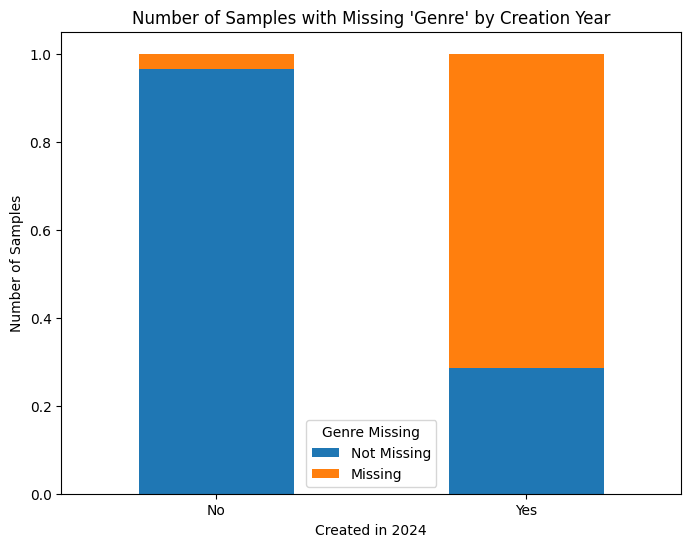

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

genre_counts = pd.crosstab(df['Created_2024'], df['Genre_Missing'])
genre_percent = genre_counts.div(genre_counts.sum(axis=1), axis=0)

genre_percent.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title("Number of Samples with Missing 'Genre' by Creation Year")
plt.xlabel('Created in 2024')
plt.ylabel('Number of Samples')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.legend(['Not Missing', 'Missing'], title='Genre Missing')
plt.show()

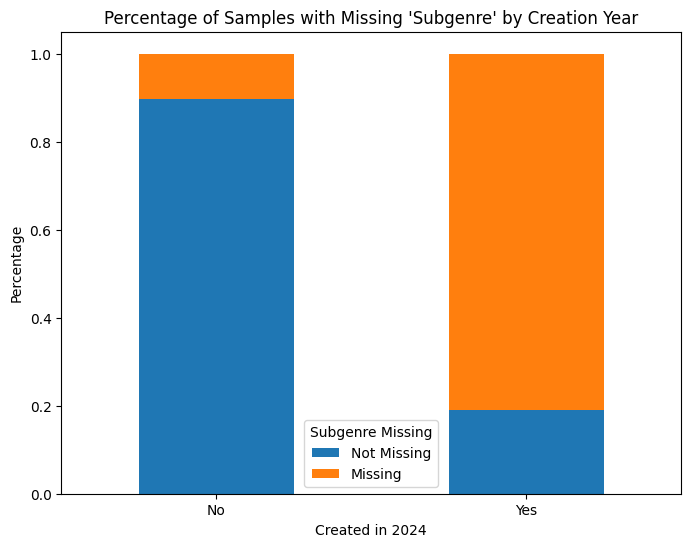

In [10]:
subgenre_counts = pd.crosstab(df['Created_2024'], df['Subgenre_Missing'])
subgenre_percent = subgenre_counts.div(subgenre_counts.sum(axis=1), axis=0)

subgenre_percent.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title("Percentage of Samples with Missing 'Subgenre' by Creation Year")
plt.xlabel('Created in 2024')
plt.ylabel('Percentage')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.legend(['Not Missing', 'Missing'], title='Subgenre Missing')
plt.show()

Conclusion:

According to the calculation and as is shown by graphs, there is a significant association between 'Created' in 2024 and missing values in 'Genre' and 'Subgenre' column.

## RQ2
Methodology: Compute the correlation between 'Active' and 'Age', where 'Age' is the day number of today's date minus 'Created' date. And create scatter plot to visualize the relationships between 'Active' and 'Age'.

Correlation between Active and Age: 0.3557


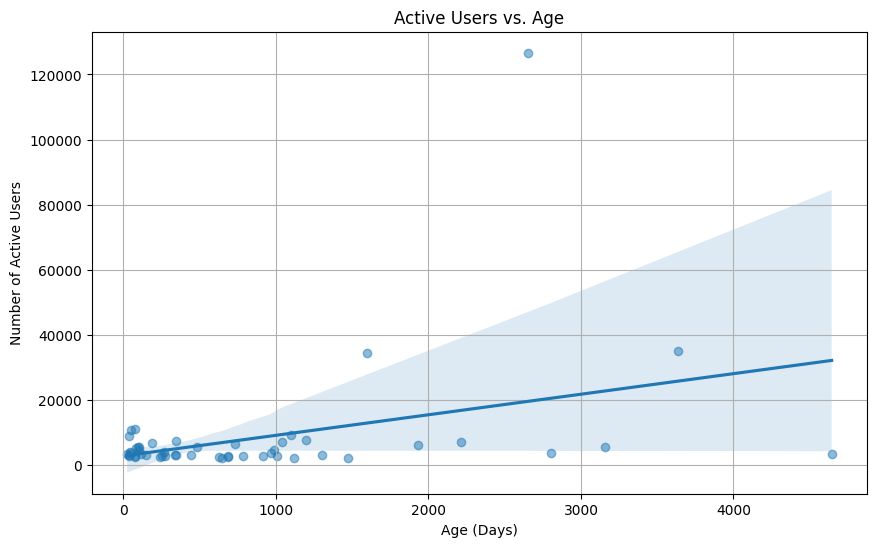

In [13]:
df['Created'] = pd.to_datetime(df['Created'])
current_date = pd.to_datetime('today')
df['Age'] = (current_date - df['Created']).dt.days

df['Total_Votes'] = df['Up Votes'] + df['Down Votes']
df['Positive_Ratio'] = df['Up Votes'] / df['Total_Votes']
df['Positive_Ratio'] = df['Positive_Ratio'].replace([float('inf'), -float('inf')], pd.NA)

df['Active'] = pd.to_numeric(df['Active'], errors='coerce')
df_corr = df[['Active', 'Age', 'Positive_Ratio']].dropna()

corr_active_age = df_corr['Active'].corr(df_corr['Age'])
corr_active_positive_ratio = df_corr['Active'].corr(df_corr['Positive_Ratio'])

print(f"Correlation between Active and Age: {corr_active_age:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Active', data=df_corr, scatter_kws={'alpha':0.5})
plt.title('Active Users vs. Age')
plt.xlabel('Age (Days)')
plt.ylabel('Number of Active Users')
plt.grid(True)
plt.show()

Conclusion:

There is some kind of positive correlation between active number and created date, which is to say, the closer the created day is, the larger active number may be. But the correlation is quite weak, so created date alone cannot well explain active number. To conclude, people kind of tend to play new games, but not absolutely.

## RQ3
Methodology: Compute the correlation between 'Active' and 'Positive Ratio', where 'Positive Ratio', also called like rate, is the 'Up Votes' number divided by the sum of 'Up Votes' number and 'Down Votes' number. And create scatter plot to visualize the relationships between 'Active' and 'Positive Ratio'.

Correlation between Active and Positive_Ratio: -0.1500


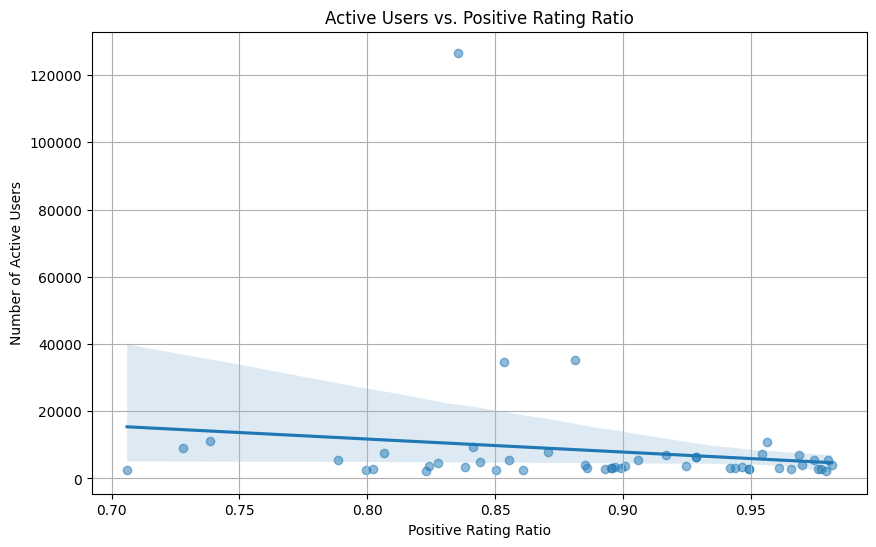

In [12]:
print(f"Correlation between Active and Positive_Ratio: {corr_active_positive_ratio:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Positive_Ratio', y='Active', data=df_corr, scatter_kws={'alpha':0.5})
plt.title('Active Users vs. Positive Rating Ratio')
plt.xlabel('Positive Rating Ratio')
plt.ylabel('Number of Active Users')
plt.grid(True)
plt.show()

Conclusion:

There is hardly negative correlation between active number and like rate. The correlation is too weak that we cannot consider like rate has much influence on active number. That is to say, the like rate of a game will barely influence whether people will play it: people will hardly take like rate into consideration when choosing game.